# A Perceptron Model Using Dot Products

## 1) Installing Libraries

In [1]:
# !conda install numpy pandas matplotlib --yes

In [2]:
# !conda install watermark

In [3]:
# !pip install torch

In [4]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,torch

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 8.18.1

numpy     : 2.0.2
pandas    : 2.2.3
matplotlib: 3.9.4
torch     : 2.6.0



## 2) Loading the Dataset

In [5]:
import pandas as pd

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [6]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [7]:
# New:

import torch

X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

In [8]:
X_train

tensor([[ 0.7700, -1.1400],
        [-0.3300,  1.4400],
        [ 0.9100, -3.0700],
        [-0.3700, -1.9100],
        [-0.6300, -1.5300],
        [ 0.3900, -1.9900],
        [-0.4900, -2.7400],
        [-0.6800, -1.5200],
        [-0.1000, -3.4300],
        [-0.0500, -1.9500],
        [ 3.8800,  0.6500],
        [ 0.7300,  2.9700],
        [ 0.8300,  3.9400],
        [ 1.5900,  1.2500],
        [ 1.1400,  3.9100],
        [ 1.7300,  2.8000],
        [ 1.3100,  1.8500],
        [ 1.5600,  3.8500],
        [ 1.2300,  2.5400],
        [ 1.3300,  2.0300]], dtype=torch.float64)

In [9]:
X_train = X_train.to(torch.float32)

In [10]:
X_train.shape

torch.Size([20, 2])

In [11]:
y_train

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
y_train.shape

torch.Size([20])

In [13]:
import numpy as np

np.bincount(y_train)

array([10, 10])

## 3) Visualizing the dataset

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

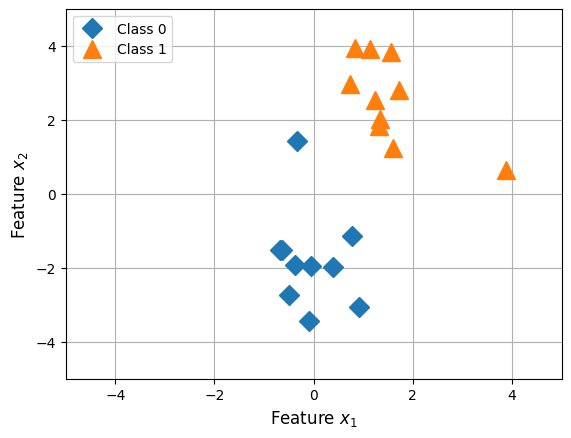

In [15]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## 4) Implementing the Perceptron

# <font color='red'>Exercise 1</font>

<font color='red'>The goal of this exercise is to simplify the code implementation
below. For this, we are going to use the `torch.where` function for the `forward` method.</font>

<font color='red'>Your task is to learn about `torch.where` [using the PyTorch documentation](https://pytorch.org/docs/stable/). Finding `torch.where` in the API documentation is part of this exercise :).</font>

<font color='red'>Then, using `torch.where` make the appropriate changes in the `forward` method below. Besides the `forward` method, nothing else needs to be changed in this notebook. Also, the predictions should be exactly like before.</font>

In [16]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features)
        self.bias = torch.tensor(0.)

    def forward(self, x):
        weighted_sum_z = torch.dot(x, self.weights) + self.bias

        prediction = torch.where(weighted_sum_z > 0., torch.tensor(1.), torch.tensor(0.))

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        self.weights += error * x

        return error

In [17]:
ppn = Perceptron(num_features=2)

In [18]:
print("Model parameters:")
print("  Weights:", ppn.weights)
print("  Bias:", ppn.bias)

Model parameters:
  Weights: tensor([0., 0.])
  Bias: tensor(0.)


In [19]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch+1} errors {error_count}")

In [20]:
ppn = Perceptron(num_features=2)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

Epoch 1 errors 1.0
Epoch 2 errors 3.0
Epoch 3 errors 1.0
Epoch 4 errors 0.0
Epoch 5 errors 0.0


## 5) Evaluating the results

In [21]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [22]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

1.0

In [23]:
print(f"Accuracy: {train_acc*100}%")

Accuracy: 100.0%


## 6) Optional: Visualizing the Decision Boundary

In [24]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

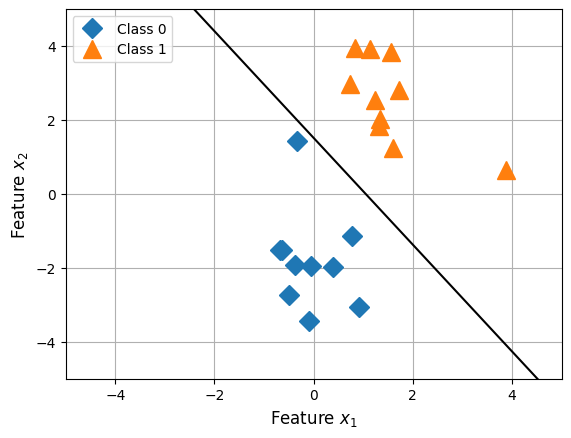

In [25]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()